In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/Bullying/CyberBullying"

/content/drive/MyDrive/Bullying/CyberBullying


In [3]:
!pwd

/content/drive/MyDrive/Bullying/CyberBullying


### Import Libraries

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
plt.rcParams["font.size"]=18

### Data Loading

In [6]:
df=pd.read_csv("input/cyberbullying_tweets.csv")

***Preliminary Analysis***

In [7]:
df.shape

(39747, 2)

In [8]:
df.head()

,tweet_text,cyberbullying_type
0,"That girl on the left, was the girl who cried ...",age
1,Earlier they shielded with Women to help terro...,religion
2,Tonight's #MKR confirms the casting people tra...,gender
3,I am a fucking idiot I am already feral right ...,religion
4,You have the audacity to call yourself a “Chri...,religion


### Data Preprocessing

In [9]:
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [10]:
df.duplicated().sum()

28

In [11]:
df=df.drop_duplicates(keep="first",ignore_index=True)

In [12]:
df["cyberbullying_type"].unique()

array(['age', 'religion', 'gender', 'ethnicity', 'other_cyberbullying'],
      dtype=object)

In [13]:
df["cyberbullying_type"].value_counts()

religion               7997
age                    7992
ethnicity              7959
gender                 7948
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

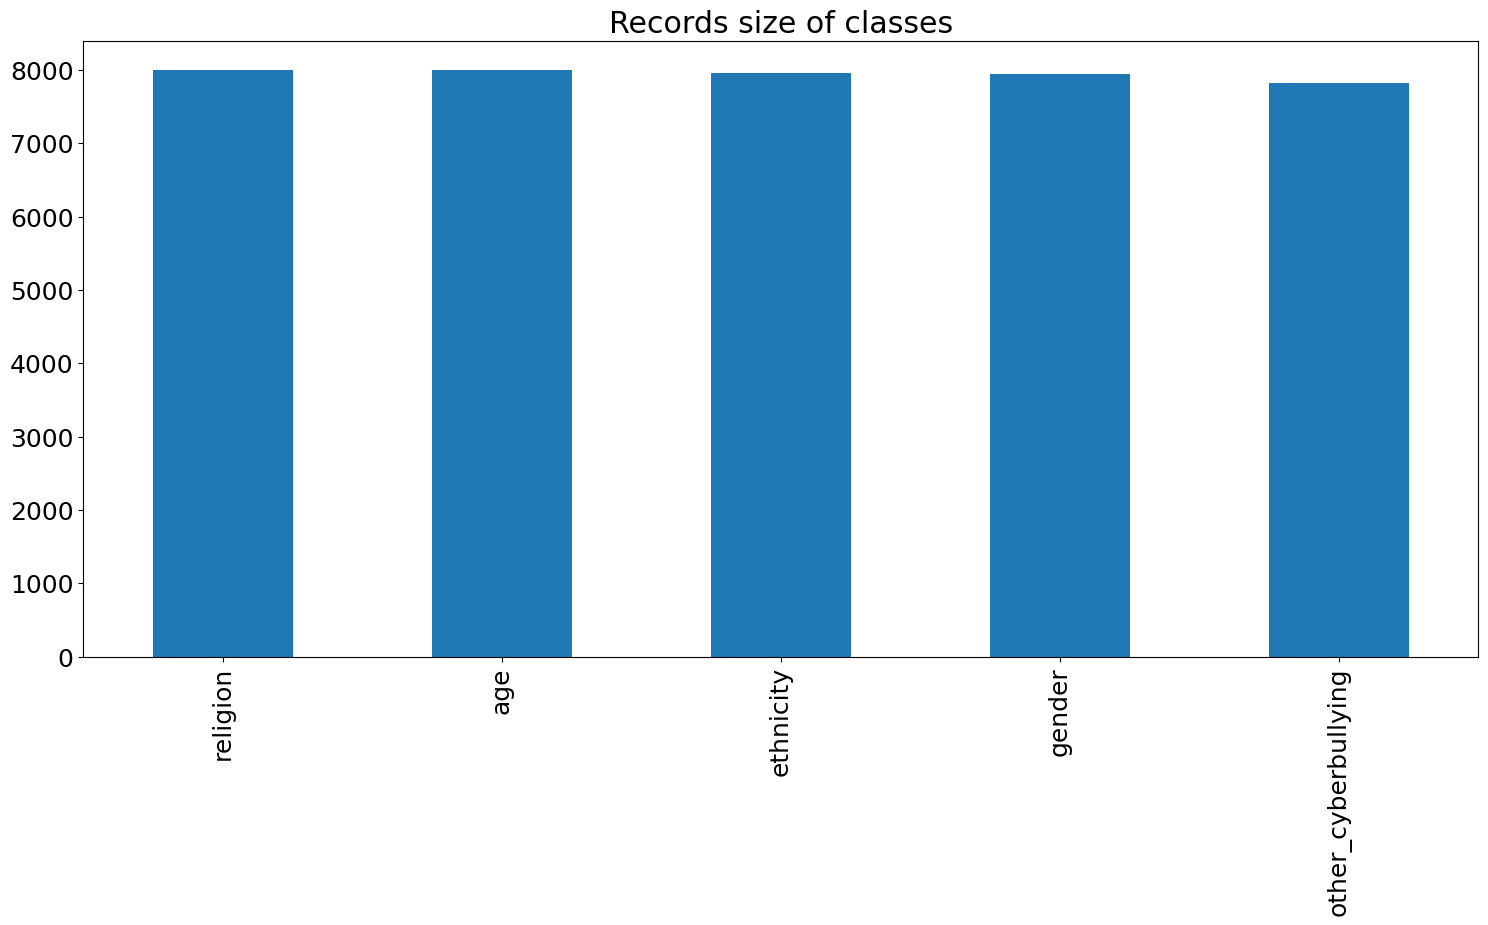

In [14]:
ax=df["cyberbullying_type"].value_counts().plot.bar(figsize=(18,8))
plt.title(label="Records size of classes")
plt.show()

In [15]:
df.head()

,tweet_text,cyberbullying_type
0,"That girl on the left, was the girl who cried ...",age
1,Earlier they shielded with Women to help terro...,religion
2,Tonight's #MKR confirms the casting people tra...,gender
3,I am a fucking idiot I am already feral right ...,religion
4,You have the audacity to call yourself a “Chri...,religion


In [16]:
class_list=list(df["cyberbullying_type"].unique())
print(class_list)

['age', 'religion', 'gender', 'ethnicity', 'other_cyberbullying']


In [17]:
records=[]
for i in range(len(class_list)):
    rec=df.loc[df["cyberbullying_type"]==class_list[i]][:3000]
    records.append(rec)

In [18]:
df=pd.concat(objs=records,ignore_index=True)

In [19]:
df.shape

(15000, 2)

### Data Cleaning

In [20]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
stopwords=set(STOP_WORDS)
import string
punctuations=string.punctuation
nlp=spacy.load("en_core_web_sm")

In [21]:
def preprocess_text(docx):
    sentence=[word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in docx]
    sentence=[word for word in sentence if word not in stopwords and word not in punctuations]
    sentence=[word for word in sentence if len(word)>1 and word.isalpha()]
    return sentence

In [22]:
import re
import pickle
cList = pickle.load(open('input/cword_dict.pkl','rb'))
c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group()]
    return c_re.sub(replace, text)

In [23]:
df.head()

,tweet_text,cyberbullying_type
0,"That girl on the left, was the girl who cried ...",age
1,"In high school, a girl in my sociology class g...",age
2,"I got 4 mains, so I will reply 4 times: Martha...",age
3,"There's a girl who bullied me in high school, ...",age
4,IM NOT GONNA BE ABLE TO BULLY OOMF AT SCHOOL A...,age


In [24]:
sentences=[]
for sentes in df["tweet_text"]:
    sentes = expandContractions(sentes)
    sp_sentes=nlp(text=sentes)
    cleaned=preprocess_text(sp_sentes)
    sentences.append(cleaned)

In [25]:
df["cleaned_data"]=sentences

In [26]:
df.head()

,tweet_text,cyberbullying_type,cleaned_data
0,"That girl on the left, was the girl who cried ...",age,"[girl, left, girl, cry, constantly, cause, bul..."
1,"In high school, a girl in my sociology class g...",age,"[high, school, girl, sociology, class, report,..."
2,"I got 4 mains, so I will reply 4 times: Martha...",age,"[main, reply, time, martha, board, game, drawi..."
3,"There's a girl who bullied me in high school, ...",age,"[girl, bully, high, school, wait, adult, yes, ..."
4,IM NOT GONNA BE ABLE TO BULLY OOMF AT SCHOOL A...,age,"[im, gonna, able, bully, oomf, school, anymore]"


In [27]:
df=df[df['cleaned_data'].map(lambda d: len(d)) > 0]

In [28]:
df.shape

(14843, 3)

In [29]:
df=df.drop(labels="tweet_text",axis=1)

### Saving Cleaned data

In [30]:
df.to_csv("textcleaned_data.csv",index=False)

### Reading cleaned data

In [31]:
df=pd.read_csv("textcleaned_data.csv")

In [32]:
df.head()

,cyberbullying_type,cleaned_data
0,age,"['girl', 'left', 'girl', 'cry', 'constantly', ..."
1,age,"['high', 'school', 'girl', 'sociology', 'class..."
2,age,"['main', 'reply', 'time', 'martha', 'board', '..."
3,age,"['girl', 'bully', 'high', 'school', 'wait', 'a..."
4,age,"['im', 'gonna', 'able', 'bully', 'oomf', 'scho..."


In [33]:
import ast
df['cleaned_data']=df['cleaned_data'].apply(lambda x: ast.literal_eval(x))

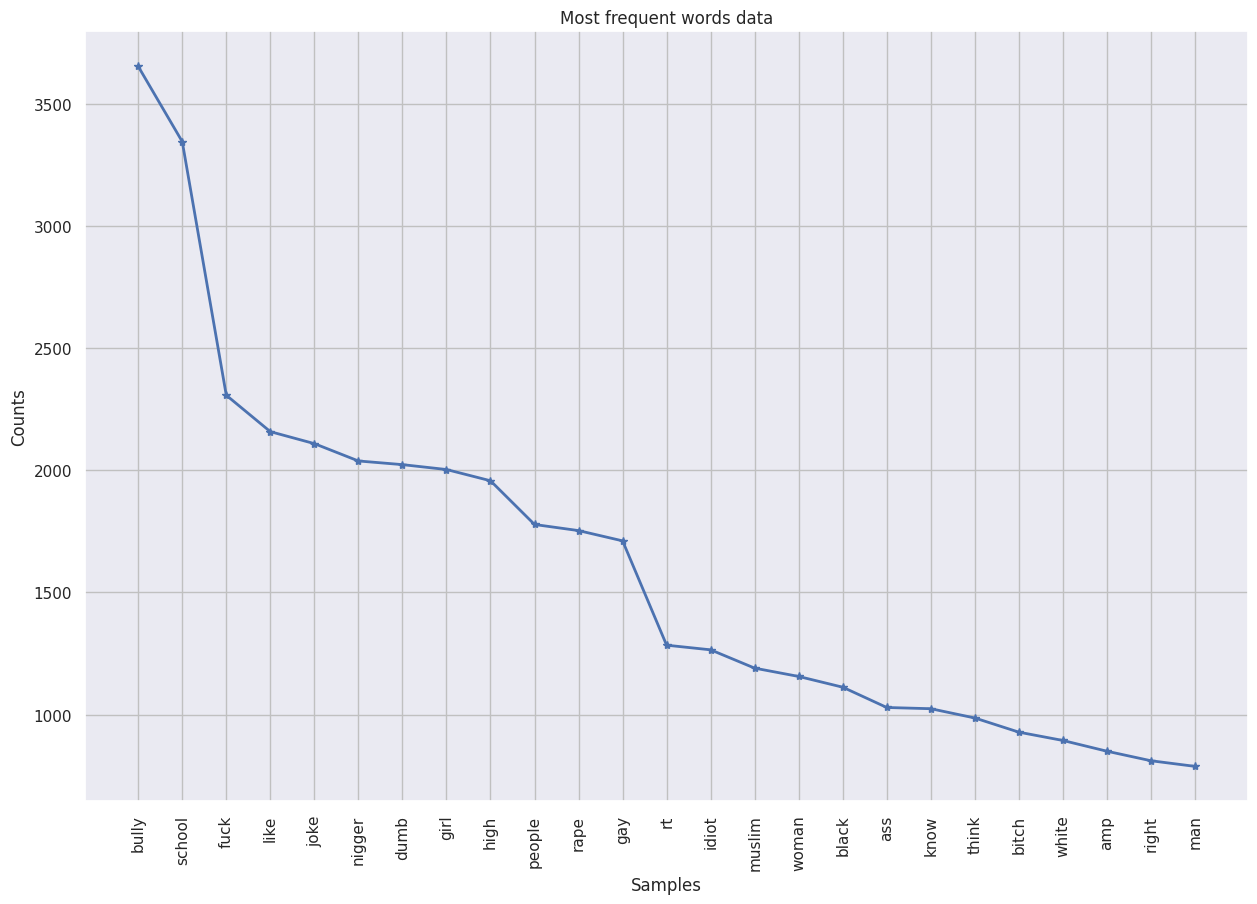

In [34]:
from nltk import FreqDist
from wordcloud import WordCloud, STOPWORDS
l = list(df['cleaned_data'])
words = [item for sublist in l for item in sublist]
word= FreqDist(words)
stopwords=set(STOPWORDS)

sns.set()
ax = plt.figure(figsize = (15,10))
plt.title(label='Most frequent words data')
word.plot(25,marker="*")
plt.show()

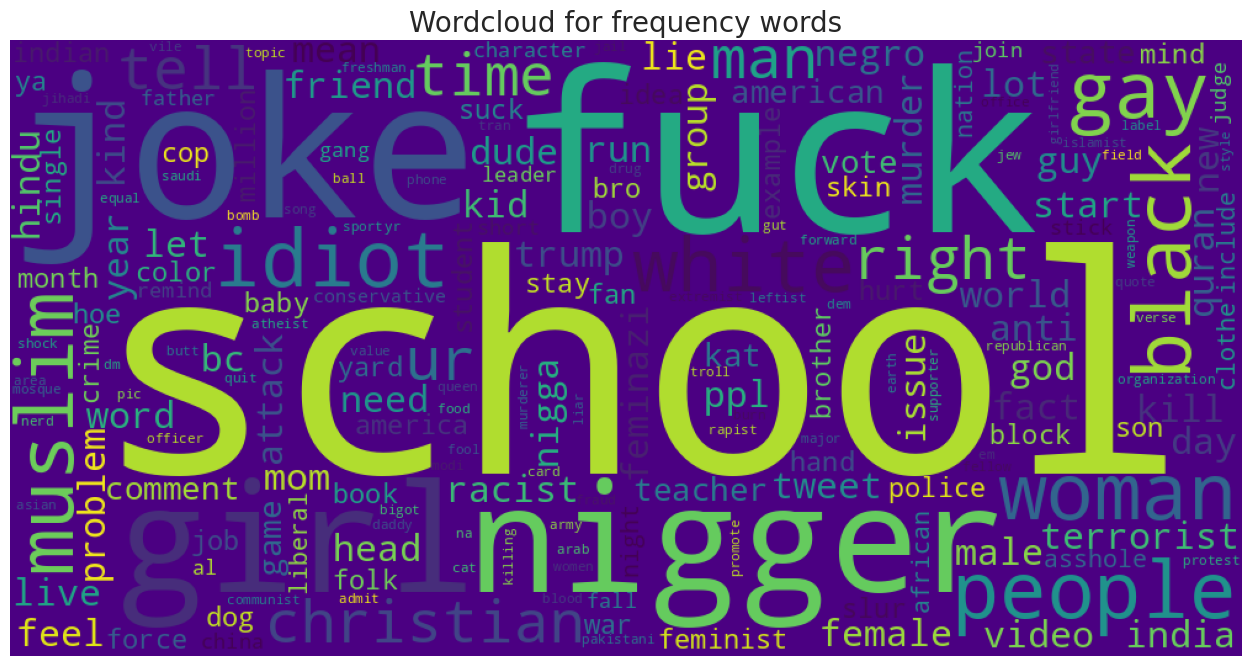

In [35]:
plt.figure(figsize=(18,8))
wordcloud = WordCloud(width = 1000,background_color ='indigo', height = 500,stopwords=stopwords).generate(",".join(str(v) for v in word))  
plt.imshow(wordcloud)
plt.axis("off")
plt.title(label='Wordcloud for frequency words',fontsize=20)
plt.show()

In [36]:
df['cleaned_data']=df['cleaned_data'].apply(lambda x:' '.join(x))

In [37]:
df=df.sample(frac=1).reset_index(drop=True)

In [38]:
df.head()

,cyberbullying_type,cleaned_data
0,other_cyberbullying,rt bsdcan lot great proposal year downside reject
1,ethnicity,little fuck mom nigger idiot hit car tell come...
2,other_cyberbullying,idiot
3,age,girl bully high school find twitter tho mutual...
4,ethnicity,know feel guilty people past mean learn like p...


In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [40]:
tok=Tokenizer()
tok.fit_on_texts(df["cleaned_data"])

In [41]:
num_data=tok.texts_to_sequences(df["cleaned_data"])

In [42]:
vocab_size=len(tok.word_index)+1
print("Unique tokens size are {}.".format(vocab_size))

Unique tokens size are 17939.


In [43]:
tok.word_index.items()

dict_items([('bully', 1), ('school', 2), ('fuck', 3), ('like', 4), ('joke', 5), ('nigger', 6), ('dumb', 7), ('girl', 8), ('high', 9), ('people', 10), ('rape', 11), ('gay', 12), ('rt', 13), ('idiot', 14), ('muslim', 15), ('woman', 16), ('black', 17), ('ass', 18), ('know', 19), ('think', 20), ('bitch', 21), ('white', 22), ('amp', 23), ('right', 24), ('man', 25), ('want', 26), ('use', 27), ('muslims', 28), ('christian', 29), ('ur', 30), ('tell', 31), ('time', 32), ('support', 33), ('fucking', 34), ('hate', 35), ('terrorist', 36), ('look', 37), ('year', 38), ('good', 39), ('shit', 40), ('need', 41), ('thing', 42), ('female', 43), ('islam', 44), ('islamic', 45), ('try', 46), ('bad', 47), ('mean', 48), ('obama', 49), ('come', 50), ('kid', 51), ('kill', 52), ('friend', 53), ('guy', 54), ('racist', 55), ('terrorism', 56), ('stop', 57), ('love', 58), ('talk', 59), ('life', 60), ('radical', 61), ('way', 62), ('funny', 63), ('sexist', 64), ('mkr', 65), ('racism', 66), ('lol', 67), ('day', 68), ('

In [44]:
import pickle
with open(file="models/tokens.pkl",mode="wb") as file:
    pickle.dump(obj=tok,file=file)

In [45]:
pad_text=pad_sequences(sequences=num_data,maxlen=300,padding="post")

In [46]:
df.head()

,cyberbullying_type,cleaned_data
0,other_cyberbullying,rt bsdcan lot great proposal year downside reject
1,ethnicity,little fuck mom nigger idiot hit car tell come...
2,other_cyberbullying,idiot
3,age,girl bully high school find twitter tho mutual...
4,ethnicity,know feel guilty people past mean learn like p...


In [47]:
str_labels=list(df["cyberbullying_type"].unique())
print(str_labels)

['other_cyberbullying', 'ethnicity', 'age', 'religion', 'gender']


In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = ['cyberbullying_type']
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [49]:
df.head()

,cyberbullying_type,cleaned_data
0,3,rt bsdcan lot great proposal year downside reject
1,1,little fuck mom nigger idiot hit car tell come...
2,3,idiot
3,0,girl bully high school find twitter tho mutual...
4,1,know feel guilty people past mean learn like p...


In [50]:
num_labels=list(df["cyberbullying_type"].unique())
label_names={}
for i in range(len(num_labels)):
    label_names[num_labels[i]]=str_labels[i]

In [51]:
print(label_names)

{3: 'other_cyberbullying', 1: 'ethnicity', 0: 'age', 4: 'religion', 2: 'gender'}


In [52]:
import pickle
with open(file="label_names.pkl",mode="wb") as file:
    pickle.dump(obj=label_names,file=file)

In [53]:
y=df["cyberbullying_type"]

In [54]:
X_train,X_test,y_train,y_test=train_test_split(pad_text,y,test_size=0.2,random_state=42)

### Algorithm : CLSTM

In [55]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Conv1D,MaxPooling1D,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [56]:
y=to_categorical(y,dtype="int64")
y_test=to_categorical(y_test,dtype="int64")

In [57]:
model=Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=300, input_length=pad_text.shape[1]))
model.add(Conv1D(filters=64,kernel_size=3,padding='valid',activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(filters=64,kernel_size=3,padding='valid',activation='relu'))
model.add(MaxPooling1D())
model.add(Dropout(0.2))
model.add(Conv1D(filters=128,kernel_size=3,padding='valid',activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(filters=128,kernel_size=3,padding='valid',activation='relu'))
model.add(MaxPooling1D())
model.add(Dropout(0.2))
model.add(Conv1D(filters=256,kernel_size=3,padding='valid',activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(filters=256,kernel_size=3,padding='valid',activation='relu'))
model.add(MaxPooling1D())
model.add(Dropout(0.2))
model.add(LSTM(200))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(5,activation='softmax'))
model.compile(optimizer="rmsprop",loss='categorical_crossentropy',metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          5381700   
                                                                 
 conv1d (Conv1D)             (None, 298, 64)           57664     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 149, 64)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 147, 64)           12352     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 73, 64)           0         
 1D)                                                             
                                                                 
 dropout (Dropout)           (None, 73, 64)            0

In [59]:
history=model.fit(pad_text,y,epochs=10,batch_size=64,validation_data=(X_test,y_test))

Epoch 1/10
232/232 [==============================] - 112s 466ms/step - loss: 1.6097 - accuracy: 0.1976 - val_loss: 1.6090 - val_accuracy: 0.2108
Epoch 2/10
232/232 [==============================] - 139s 600ms/step - loss: 1.0864 - accuracy: 0.4633 - val_loss: 0.7751 - val_accuracy: 0.5854
Epoch 3/10
232/232 [==============================] - 126s 542ms/step - loss: 0.7116 - accuracy: 0.6617 - val_loss: 0.3844 - val_accuracy: 0.8885
Epoch 4/10
232/232 [==============================] - 105s 451ms/step - loss: 0.3330 - accuracy: 0.9025 - val_loss: 0.2050 - val_accuracy: 0.9535
Epoch 5/10
232/232 [==============================] - 104s 449ms/step - loss: 0.2279 - accuracy: 0.9373 - val_loss: 0.1465 - val_accuracy: 0.9663
Epoch 6/10
232/232 [==============================] - 101s 436ms/step - loss: 0.1758 - accuracy: 0.9549 - val_loss: 0.1227 - val_accuracy: 0.9727
Epoch 7/10
232/232 [==============================] - 105s 453ms/step - loss: 0.1332 - accuracy: 0.9674 - val_loss: 0.0998 -

In [60]:
model_predictions=model.predict(X_test,batch_size=64,verbose=1)

47/47 [==============================] - 4s 78ms/step


In [61]:
print(model_predictions)

[[7.79861165e-03 1.40208378e-03 9.49408766e-03 9.78318572e-01
  2.98655406e-03]
 [9.98027086e-01 6.95346462e-05 3.20984516e-04 1.39432971e-03
  1.88106482e-04]
 [9.13302028e-06 9.99819517e-01 7.37989467e-05 7.56420341e-05
  2.18241239e-05]
 ...
 [1.46882923e-03 1.04756316e-03 9.94656086e-01 2.76123569e-03
  6.62237580e-05]
 [5.71136570e-06 9.99885499e-01 4.66651363e-05 4.34768626e-05
  1.84481742e-05]
 [1.08839515e-04 1.11750785e-04 9.99707282e-01 7.12287583e-05
  7.82744053e-07]]


In [62]:
model_pred=[]
for i in range(len(model_predictions)):
    model_pred.append(np.argmax(model_predictions[i]))

In [63]:
print(model_pred)

[3, 0, 1, 4, 4, 2, 1, 0, 3, 3, 1, 0, 1, 3, 2, 2, 4, 0, 4, 0, 4, 1, 4, 0, 1, 0, 1, 3, 4, 0, 2, 4, 1, 2, 1, 1, 2, 0, 2, 2, 4, 2, 0, 1, 2, 4, 1, 0, 0, 1, 3, 1, 0, 1, 3, 2, 0, 2, 0, 2, 4, 3, 4, 3, 2, 2, 2, 1, 2, 1, 1, 3, 3, 1, 0, 0, 4, 0, 2, 4, 3, 3, 3, 0, 0, 1, 2, 1, 2, 1, 3, 0, 4, 3, 1, 1, 2, 3, 4, 1, 3, 2, 2, 0, 2, 2, 2, 3, 4, 4, 0, 3, 2, 3, 4, 2, 0, 0, 0, 4, 1, 0, 0, 1, 3, 2, 0, 1, 3, 2, 0, 1, 0, 4, 4, 0, 3, 4, 4, 1, 0, 0, 4, 3, 2, 3, 3, 4, 4, 2, 0, 3, 4, 2, 1, 0, 0, 0, 4, 2, 0, 2, 4, 2, 3, 0, 0, 2, 3, 1, 3, 0, 2, 0, 1, 1, 1, 0, 2, 4, 1, 0, 1, 1, 3, 2, 0, 4, 4, 2, 4, 0, 0, 0, 0, 3, 1, 3, 3, 1, 3, 4, 4, 3, 1, 2, 4, 2, 0, 2, 1, 2, 2, 1, 3, 2, 2, 1, 4, 0, 1, 3, 0, 1, 4, 0, 4, 2, 3, 3, 2, 4, 2, 2, 1, 4, 3, 0, 0, 1, 1, 0, 4, 0, 3, 2, 2, 3, 1, 0, 2, 0, 2, 4, 2, 4, 2, 2, 4, 2, 3, 1, 1, 2, 2, 2, 3, 0, 4, 4, 4, 3, 0, 0, 4, 0, 3, 1, 3, 1, 0, 0, 3, 2, 3, 1, 4, 3, 0, 0, 1, 4, 3, 2, 3, 3, 4, 1, 3, 0, 1, 1, 0, 2, 0, 1, 0, 0, 1, 4, 4, 3, 1, 1, 4, 0, 4, 2, 0, 0, 3, 3, 0, 2, 4, 3, 4, 2, 1, 2, 3, 4, 0, 

In [64]:
y_true=[]
for i in range(len(y_test)):
    y_true.append(np.argmax(y_test[i]))

In [65]:
print(y_true)

[3, 0, 1, 4, 4, 2, 1, 0, 3, 3, 1, 0, 1, 3, 2, 2, 4, 0, 4, 0, 4, 1, 4, 1, 1, 0, 1, 3, 4, 0, 2, 4, 1, 2, 1, 1, 2, 0, 2, 2, 4, 2, 0, 1, 2, 4, 1, 0, 0, 1, 3, 1, 0, 1, 3, 2, 0, 2, 0, 2, 4, 3, 4, 3, 2, 2, 2, 1, 2, 1, 1, 3, 3, 1, 0, 0, 4, 0, 2, 4, 3, 3, 3, 0, 0, 1, 2, 1, 2, 1, 3, 0, 4, 3, 1, 1, 2, 3, 4, 1, 3, 2, 2, 0, 2, 2, 2, 3, 4, 4, 0, 3, 2, 3, 4, 2, 0, 0, 0, 4, 1, 0, 0, 1, 3, 2, 0, 1, 3, 2, 0, 1, 0, 4, 4, 0, 3, 4, 4, 1, 0, 0, 4, 3, 2, 3, 3, 4, 4, 2, 0, 3, 4, 2, 1, 0, 0, 0, 4, 2, 0, 1, 4, 2, 3, 0, 0, 2, 3, 1, 3, 0, 2, 0, 1, 1, 1, 0, 2, 4, 1, 0, 1, 1, 3, 2, 0, 4, 4, 2, 4, 0, 0, 0, 0, 3, 1, 3, 3, 1, 3, 4, 4, 3, 1, 2, 4, 2, 0, 2, 1, 2, 2, 1, 3, 2, 2, 1, 4, 0, 1, 3, 0, 1, 4, 0, 4, 2, 3, 3, 2, 4, 2, 2, 1, 4, 3, 0, 0, 1, 1, 0, 4, 0, 3, 3, 2, 3, 1, 0, 2, 0, 2, 4, 2, 4, 2, 2, 4, 2, 3, 1, 1, 2, 2, 2, 3, 0, 4, 4, 4, 3, 0, 0, 4, 0, 3, 1, 3, 1, 0, 0, 3, 2, 3, 1, 4, 3, 0, 0, 1, 4, 3, 2, 3, 3, 4, 1, 3, 0, 1, 1, 0, 2, 0, 1, 0, 0, 1, 4, 4, 3, 1, 1, 4, 0, 4, 2, 3, 0, 3, 3, 0, 2, 4, 3, 4, 2, 1, 2, 3, 4, 0, 

### Result Analysis

***Accuracy Score***

In [66]:
lstm_accuracy=accuracy_score(y_true=y_true,y_pred=model_pred)
print("CNN-LSTM model accuracy is {:.2f}%".format(lstm_accuracy*100.0))

CNN-LSTM model accuracy is 98.48%


***Classification Report***

In [67]:
print(classification_report(y_true=y_true,y_pred=model_pred,target_names=str_labels))

                     precision    recall  f1-score   support

other_cyberbullying       0.98      0.99      0.98       600
          ethnicity       1.00      0.99      0.99       626
                age       0.97      0.98      0.98       598
           religion       0.98      0.98      0.98       561
             gender       1.00      0.99      0.99       584

           accuracy                           0.98      2969
          macro avg       0.98      0.98      0.98      2969
       weighted avg       0.98      0.98      0.98      2969



***Confusion Matrix***

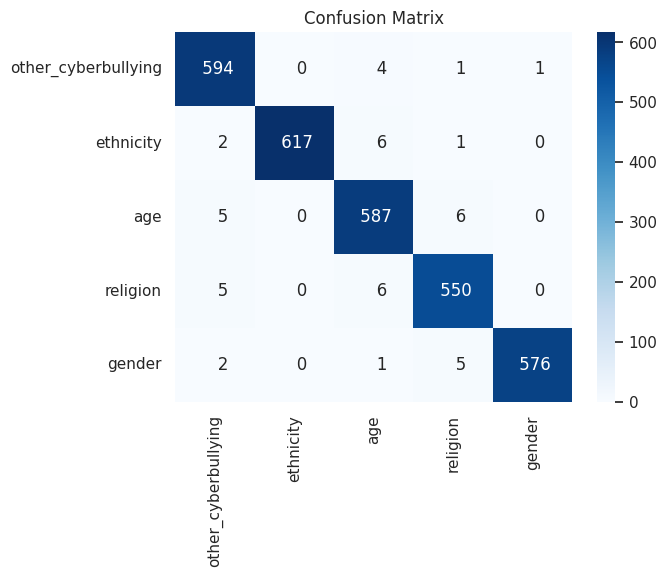

In [68]:
import seaborn as sns
ax=sns.heatmap(data=confusion_matrix(y_true,model_pred),
              xticklabels=str_labels,
              yticklabels=str_labels,
               annot=True,
               fmt='4d',
              cmap=plt.cm.Blues)
plt.title(label="Confusion Matrix")
plt.show()

### Model Saving

In [69]:
model.save("models/Convolutional_LongShortTermMemory_model.h5")

## Thank You